In [1]:
#dikkate alınması gerekmeyen uyarıları gizlemek için 'ignore' kullanılır.
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors

#MAKİNE ÖĞRENMESİ KÜTÜPHANELERİ
!pip install yellowbrick
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

#UNSUPERVİSED LEARNİNG(GÖZETİMSİZ ÖĞRENME)--Veri setindeki yapıları ve ilişkileri anlamak için 
#kullanılır.Amacı verileri gruplara ayırmak veya benzerlikleri keşfetmektir.


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

#Treemap (Ağaç Haritaları) oluşturmak için:
!pip install squarify 
#CLV (Customer Lifetime Value) analizi yapmak için:
!pip install lifetimes 

import os
import datetime
import squarify
import warnings
import datetime as dt
from operator import attrgetter
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.metrics import (silhouette_score, calinski_harabasz_score, davies_bouldin_score)
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
palette='Set2'

#Plotly kütüphanesinin Jupyter Notebook ortamında etkileşimli görselleştirmeler oluşturmasını sağlamak için:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df = pd.read_excel('bilgehan (2).xlsx')
df.head(10)   #Veri setini listeleyecek


,FATURA NUMARASI,STOK KOD,ALINAN ÜRÜN,MİKTAR,FATURA TARİHİ,BİRİM FİYATI,MÜŞTERİ ID
0,BK31876,20029,STOK-20029,6,2023-04-03 00:00:00.000,62.50,14752.0
1,KG38165,11206,STOK-11206,6,2023-11-23 00:00:00.000,115.00,14367.0
2,KG31885,11206,STOK-11206,6,2023-03-30 00:00:00.000,82.18,14367.0
3,BK31037,11206,STOK-11206,4,2023-02-22 00:00:00.000,82.51,13944.0
4,BK35159,27015,STOK-27015,12,2023-09-30 00:00:00.000,9.28,14673.0
5,BK33654,11206,STOK-11206,6,2023-06-26 00:00:00.000,90.24,15035.0
6,BK35685,11206,STOK-11206,30,2023-11-07 00:00:00.000,103.96,13174.0
7,KG38102,11206,STOK-11206,3,2023-11-20 00:00:00.000,115.00,13330.0
8,BK35898,11206,STOK-11206,6,2023-11-22 00:00:00.000,115.00,15140.0
9,BK34888,11206,STOK-11206,12,2023-09-12 00:00:00.000,97.98,12558.0


In [3]:
#Plotly kütüphanesinin Jupyter Notebook ortamında etkileşimli görselleştirmeler oluşturmasını sağlamak için:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Veri Ön İşleme

In [4]:
df = df.dropna(subset=['MÜŞTERİ ID'])
#veri setindeki verilen kolonların eksik değerleri (NaN) içeren satırları kaldırır.

In [5]:
#dataframin özellikleri, veri çerçevesinin özellikleri, veri tipleri, ilk ve son satır, eksik 
#veya yinelen satırlar gibi özellikleri:
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0])) #satır bilgisi
    print('Columns: {}'.format(dataframe.shape[1])) #sütun bilgisi
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes) #kolonların veri türlerini verir
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head)) #ilk 5 satırı verir
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head)) #son 5 satırı verir
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum()) #hangi satırda kaç eksik değer olduğunu verir
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum()) #aynı olan satırların sayısını verir
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T) #Amaç: Her sayısal sütun için temel istatistikleri 
    #verir.Yüzde birlik (quantile) değerlerini de hesaplar
    
check_data(df)

------------------------------- SHAPE --------------------------------
Rows: 62135
Columns: 7
------------------------------- TYPES --------------------------------
FATURA NUMARASI     object
STOK KOD             int64
ALINAN ÜRÜN         object
MİKTAR               int64
FATURA TARİHİ       object
BİRİM FİYATI       float64
MÜŞTERİ ID         float64
dtype: object
-------------------------------- HEAD --------------------------------
  FATURA NUMARASI  STOK KOD ALINAN ÜRÜN  MİKTAR            FATURA TARİHİ  \
0         BK31876     20029  STOK-20029       6  2023-04-03 00:00:00.000   
1         KG38165     11206  STOK-11206       6  2023-11-23 00:00:00.000   
2         KG31885     11206  STOK-11206       6  2023-03-30 00:00:00.000   
3         BK31037     11206  STOK-11206       4  2023-02-22 00:00:00.000   
4         BK35159     27015  STOK-27015      12  2023-09-30 00:00:00.000   

   BİRİM FİYATI  MÜŞTERİ ID  
0         62.50     14752.0  
1        115.00     14367.0  
2         82.1

In [6]:
df.isnull().sum()
#boş veri kalmadığından emin ol

FATURA NUMARASI    0
STOK KOD           0
ALINAN ÜRÜN        0
MİKTAR             0
FATURA TARİHİ      0
BİRİM FİYATI       0
MÜŞTERİ ID         0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
#yinelen verileri silip tekrar kontrol et
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.shape[0]

62134

In [10]:
#STOK KOD sütununda yer alan benzersiz (unique) değerlerin sayısını hesaplar ve sonucu tekil_stok_kodlari değişkenine atar.
tekil_stok_kodlari = df['STOK KOD'].nunique()
print(f"Veri Setndeki Benzersiz Stok Kodu Sayısı: {tekil_stok_kodlari}")

Veri Setndeki Benzersiz Stok Kodu Sayısı: 537


# RFM Analizi

In [11]:
#en son gerçekleşen faturanın tarihi
df["FATURA TARİHİ"].max()

'2023-12-30 00:00:00.000'

In [12]:
#bugnün tarihini belirliyoruz
today_date= dt.datetime(2024,1,10)

In [13]:
#bugünün tarihi ile fatura tarihinin türünü datetime olarak belirledik
df["FATURA TARİHİ"] = pd.to_datetime(df["FATURA TARİHİ"])

In [14]:
df.dtypes

FATURA NUMARASI            object
STOK KOD                    int64
ALINAN ÜRÜN                object
MİKTAR                      int64
FATURA TARİHİ      datetime64[ns]
BİRİM FİYATI              float64
MÜŞTERİ ID                float64
dtype: object

In [15]:
df["FATURA NUMARASI"].nunique()

15671

In [16]:
df["TOPLAM FİYAT"]= df["MİKTAR"]*df["BİRİM FİYATI"]

In [17]:
df.head(10)

,FATURA NUMARASI,STOK KOD,ALINAN ÜRÜN,MİKTAR,FATURA TARİHİ,BİRİM FİYATI,MÜŞTERİ ID,TOPLAM FİYAT
0,BK31876,20029,STOK-20029,6,2023-04-03,62.50,14752.0,375.00
1,KG38165,11206,STOK-11206,6,2023-11-23,115.00,14367.0,690.00
2,KG31885,11206,STOK-11206,6,2023-03-30,82.18,14367.0,493.08
3,BK31037,11206,STOK-11206,4,2023-02-22,82.51,13944.0,330.04
4,BK35159,27015,STOK-27015,12,2023-09-30,9.28,14673.0,111.36
5,BK33654,11206,STOK-11206,6,2023-06-26,90.24,15035.0,541.44
6,BK35685,11206,STOK-11206,30,2023-11-07,103.96,13174.0,3118.80
7,KG38102,11206,STOK-11206,3,2023-11-20,115.00,13330.0,345.00
8,BK35898,11206,STOK-11206,6,2023-11-22,115.00,15140.0,690.00
9,BK34888,11206,STOK-11206,12,2023-09-12,97.98,12558.0,1175.76


In [18]:
# Recency(Yenilik) : Müşterinin son satın almasından bugüne kadar olan geçen süre
# Frequency(Sıklık) : Toplam satın alma sayısı
# Monetary( Parasal değer) : Müşterinin yaptığı toplam harcama

rfm = df.groupby('MÜŞTERİ ID').agg({'FATURA TARİHİ': lambda x: (today_date - x.max()).days, #days kısmını almak istediğimiz için .days yaptık
                                     'FATURA NUMARASI': lambda x: x.nunique(),
                                     'TOPLAM FİYAT': lambda x: x.sum()
                                   })
rfm.head()

,FATURA TARİHİ,FATURA NUMARASI,TOPLAM FİYAT
MÜŞTERİ ID,,,
12005.0,18,28,293643.49
12008.0,14,25,104992.45
12010.0,18,49,130220.31
12011.0,20,17,40877.54
12012.0,14,38,174263.15


In [19]:
rfm.columns = ['recency', 'frequency', 'monetary']

#indeksi normal bir sütun haline getirir. Yani, önceden indeks olan sütunlar artık DataFrame'in bir parçası olur 
#ve varsayılan sayısal bir indeks (0, 1, 2, ...) oluşturulur.
rfm.reset_index().head()


,MÜŞTERİ ID,recency,frequency,monetary
0,12005.0,18,28,293643.49
1,12008.0,14,25,104992.45
2,12010.0,18,49,130220.31
3,12011.0,20,17,40877.54
4,12012.0,14,38,174263.15


In [20]:
#rfm skoru oluşturma:
#recency'de daha geç gelen daha önemli olduğu için 5'den başladık
rfm["recency_score"] = pd.qcut(rfm["recency"],5,labels=[5,4,3,2,1])
#frequency'de işlem sayısı yüksek olan daha yüksek olacak.
#(Aynı değere sahip olan veriler arasında, veri setinde önce gelen daha düşük sırayı alır.)
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method='first'),5,labels=[1,2,3,4,5])
#Monetary'de müşterinin yaptığı harcama az ise daha düşük değer alır
rfm["monetary_score"] = pd.qcut(rfm["monetary"],5,labels=[1,2,3,4,5])

rfm.reset_index().head()

,MÜŞTERİ ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,12005.0,18,28,293643.49,4,4,5
1,12008.0,14,25,104992.45,5,4,4
2,12010.0,18,49,130220.31,4,5,4
3,12011.0,20,17,40877.54,4,3,3
4,12012.0,14,38,174263.15,5,5,4


In [21]:
rfm["RF_SCORE"]= rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str)
rfm.reset_index().head()

,MÜŞTERİ ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
0,12005.0,18,28,293643.49,4,4,5,44
1,12008.0,14,25,104992.45,5,4,4,54
2,12010.0,18,49,130220.31,4,5,4,45
3,12011.0,20,17,40877.54,4,3,3,43
4,12012.0,14,38,174263.15,5,5,4,55


In [22]:
#segmentasyon map ağacı
seg_map = {
    r'[1-2][1-2]': 'kış_uykusu', #Son alışveriş uzun zaman önce yapılmış(pasif müşteri),alışveriş sıklığı düşük 
    r'[1-2][3-4]': 'risk_altında',#Bu müşteriler geçmişte aktifti, ancak şu an pasif hale gelmiş olabilirler
    r'[1-2]5': 'kaybedemem', #uzun süre gelmemiş ama çok alışveriş yapmış
    r'3[1-2]': 'uyumak_üzere', #gelmeyeli ort bi zaman geçmiş, az alışveriş yapmış
    r'33': 'dikkat_gerekir', #gelmeyeli ort zaman geçmiş, orta düzeyde alışveriş yapmış
    r'[3-4][4-5]': 'sadık_müşteri',#son alışveriş yakın zamanda yapılmış,sık alışveriş yapıyor
    r'41': 'umut_verici', #Son alışveriş çok yakın zamanda yapılmış,henüz az alışveriş yapmış
    r'51': 'yeni_müşteriler', #Son alışveriş çok yakın zamanda yapılmış, henüz az alışveriş yapmış
    r'[4-5][2-3]': 'potansiyel_sadıklar', #Son alışveriş çok yakın zamanda yapılmış, Orta düzeyde alışveriş sıklığına sahip
    r'5[4-5]': 'şampiyonlar'#Son alışveriş çok yakın zamanda yapılmış, çok sık alışveriş yapıyor
}

In [23]:
#segment isimli kolona rf skorları sonucunda map ağacı ile eşleşenlere karşılık gelen değer yazılır
rfm["segment"] = rfm["RF_SCORE"].replace(seg_map,regex=True)
rfm["segment"].value_counts()

segment
kış_uykusu             194
sadık_müşteri          120
şampiyonlar            118
potansiyel_sadıklar     76
risk_altında            62
dikkat_gerekir          34
uyumak_üzere            28
umut_verici             14
kaybedemem               8
yeni_müşteriler          5
Name: count, dtype: int64

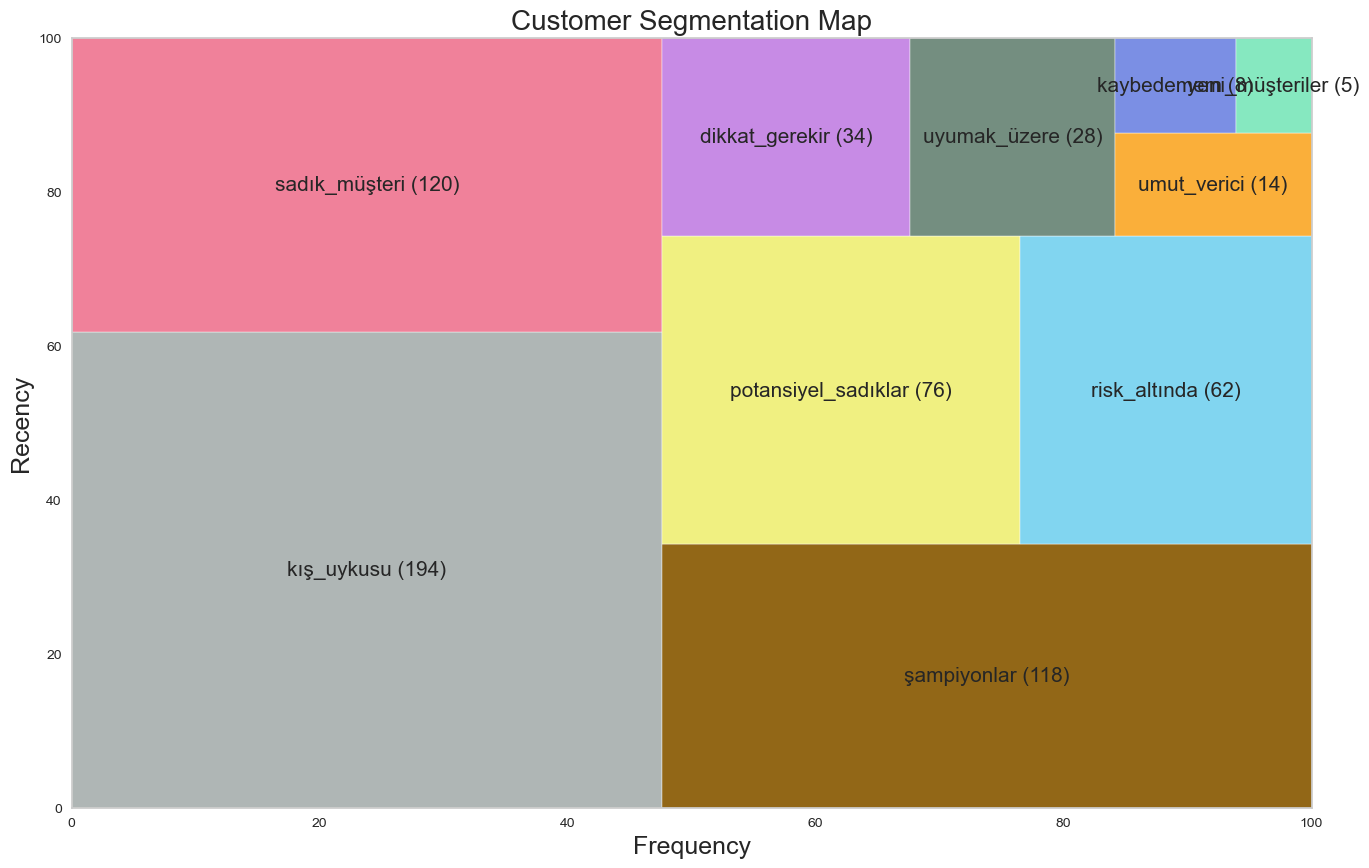

In [24]:
import matplotlib.pyplot as plt
import squarify #Verileri kareler halinde (treemap) görselleştirmek için kullanılan bir kütüphane.

#Her bir segmentin kaç müşteriden oluştuğunu sayar.Segmentleri müşteri sayısına göre azalan sırada sıralar.
segments = rfm["segment"].value_counts().sort_values(ascending=False)

colors=[
    "#AFB6B5",
    "#F0819A",
    "#926717",
    "#F0F081",
    "#81D5F0",
    "#C78BE5",
    "#748E80",
    "#FAAF3A",
    "#7B8FE4",
    "#86E8C0"
]

# Segment isimlerini (index) etiket olarak kullanır. Bu etiketler grafikte görünecek.(labels = segments.index
#segment isimleriyle beraber segmentteki müşteri sayılarını da yazdırır
labels = [f"{segment} ({count})" for segment, count in zip(segments.index, segments.values)]

# Grafik ayarları
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)

# Squarify plot
squarify.plot(
    sizes=segments,
    label=labels,
    color=colors[:len(segments)],  # Renk sayısını segment sayısına göre ayarlayın
    pad=False, #kareler arası boşlukları kaldırır
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)

# Başlık ve etiketler
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)

plt.show()

In [25]:
print(' RFM Model Evaluation '.center(70, '='))
X = rfm[['recency_score', 'frequency_score']]
labels = rfm['segment']
print(f'Number of Observations: {X.shape[0]}') #X veri çerçevesindeki satır sayısını (gözlem sayısını) döndürür.
print(f'Number of Segments: {labels.nunique()}') #labels sütunundaki benzersiz segment sayısını döndürür.
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')  
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}') 
#Silhouette Skoru, kümeleme sonuçlarının ne kadar iyi olduğunu gösteren metriktir. 
#Calinski Harabasz Skoru, kümeleme sonuçlarının kalitesini değerlendiren bir metriktir.
#Üst sınır yok, daha yüksek değer daha iyi. 100 üzerinde olması beklenir
#Davies Bouldin Skoru, kümelerin ne kadar benzer olduğunu ölçer. Daha düşük değerler, daha iyi bir kümelenmeyi gösterir.


======================== RFM Model Evaluation ========================
Number of Observations: 659
Number of Segments: 10
Silhouette Score: 0.514
Calinski Harabasz Score: 779.959
Davies Bouldin Score: 0.569 


In [26]:
rfm[['recency','monetary','frequency','segment']]\
.groupby('segment')\
.agg({'mean','count','max','min'})

recency                         monetary                 \
                        min        mean  max count       min           mean   
segment                                                                       
dikkat_gerekir           25   30.941176   40    34   4729.60  136366.120588   
kaybedemem               42   71.625000  109     8  24380.43  266555.001250   
kış_uykusu               44  193.164948  372   194    217.37   48682.102887   
potansiyel_sadıklar      11   17.184211   23    76   6876.96   63207.359605   
risk_altında             42   82.532258  216    62   9226.71  153592.032258   
sadık_müşteri            16   24.475000   41   120  15408.51  246782.200583   
umut_verici              18   20.357143   23    14   1000.00   20696.273571   
uyumak_üzere             26   34.035714   41    28      2.73  264269.698571   
yeni_müşteriler          12   13.000000   15     5   6047.42   24109.122000   
şampiyonlar              11   13.440678   15   118  22939.38  808768.553305   

                                       frequency                         
                             max count       min       mean   max count  
segment                                                                  
dikkat_gerekir        1768356.52    34        10  13.911765    18    34  
kaybedemem             872983.87     8        29  32.375000    42     8  
kış_uykusu             894711.30   194         1   3.664948    10   194  
potansiyel_sadıklar    546208.64    76         3  11.868421    17    76  
risk_altında          1849154.93    62        10  15.838710    28    62  
sadık_müşteri         4295821.15   120        18  30.241667    98   120  
umut_verici             89255.31    14         1   1.500000     3    14  
uyumak_üzere          6380585.00    28         1   6.178571    10    28  
yeni_müşteriler         42177.60     5         1   2.000000     3     5  
şampiyonlar          18480753.49   118        18  72.127119  1668   118

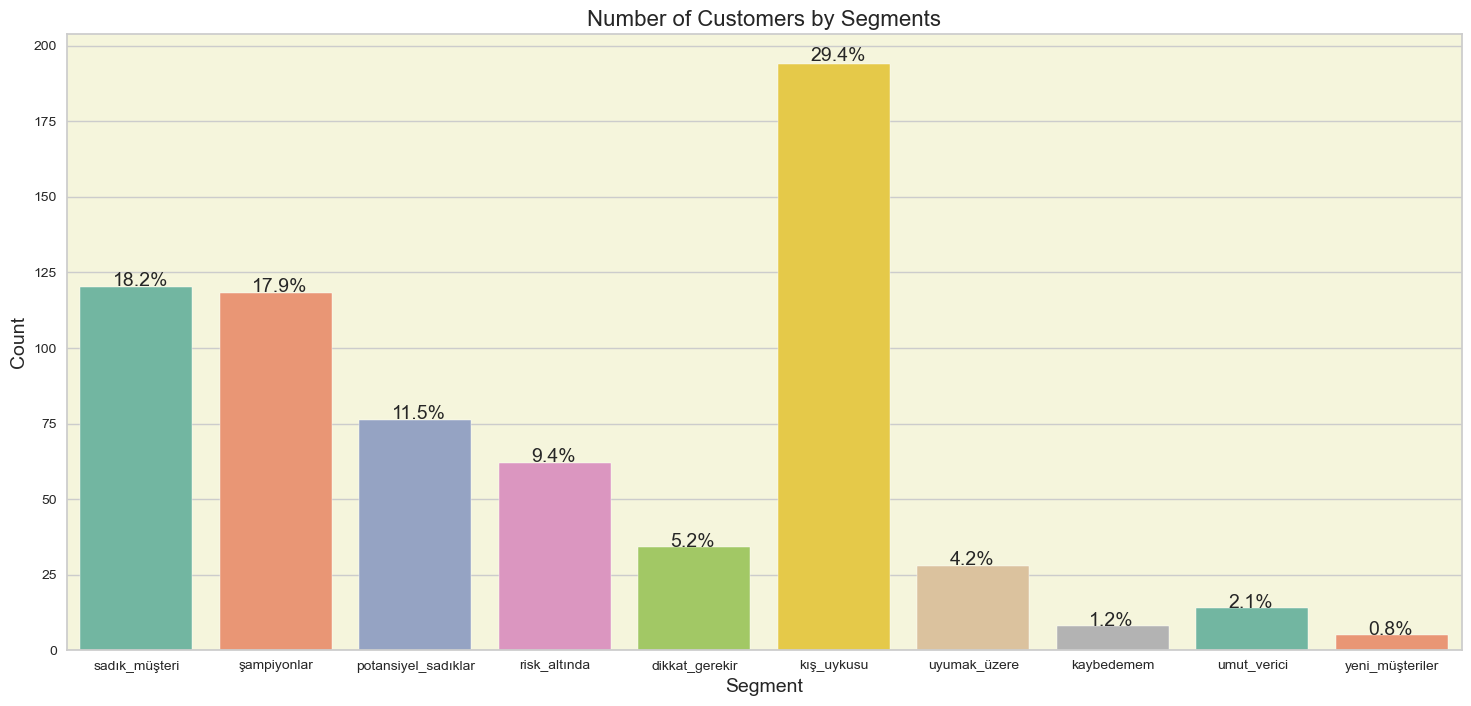

In [27]:
#bar chart (çubuk grafik) 
plt.figure(figsize = (18, 8))
ax = plt.gca()  # Mevcut ekseni al
ax.set_facecolor('beige')
ax = sns.countplot(data = rfm,
                   x = 'segment',
                   palette = palette)
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

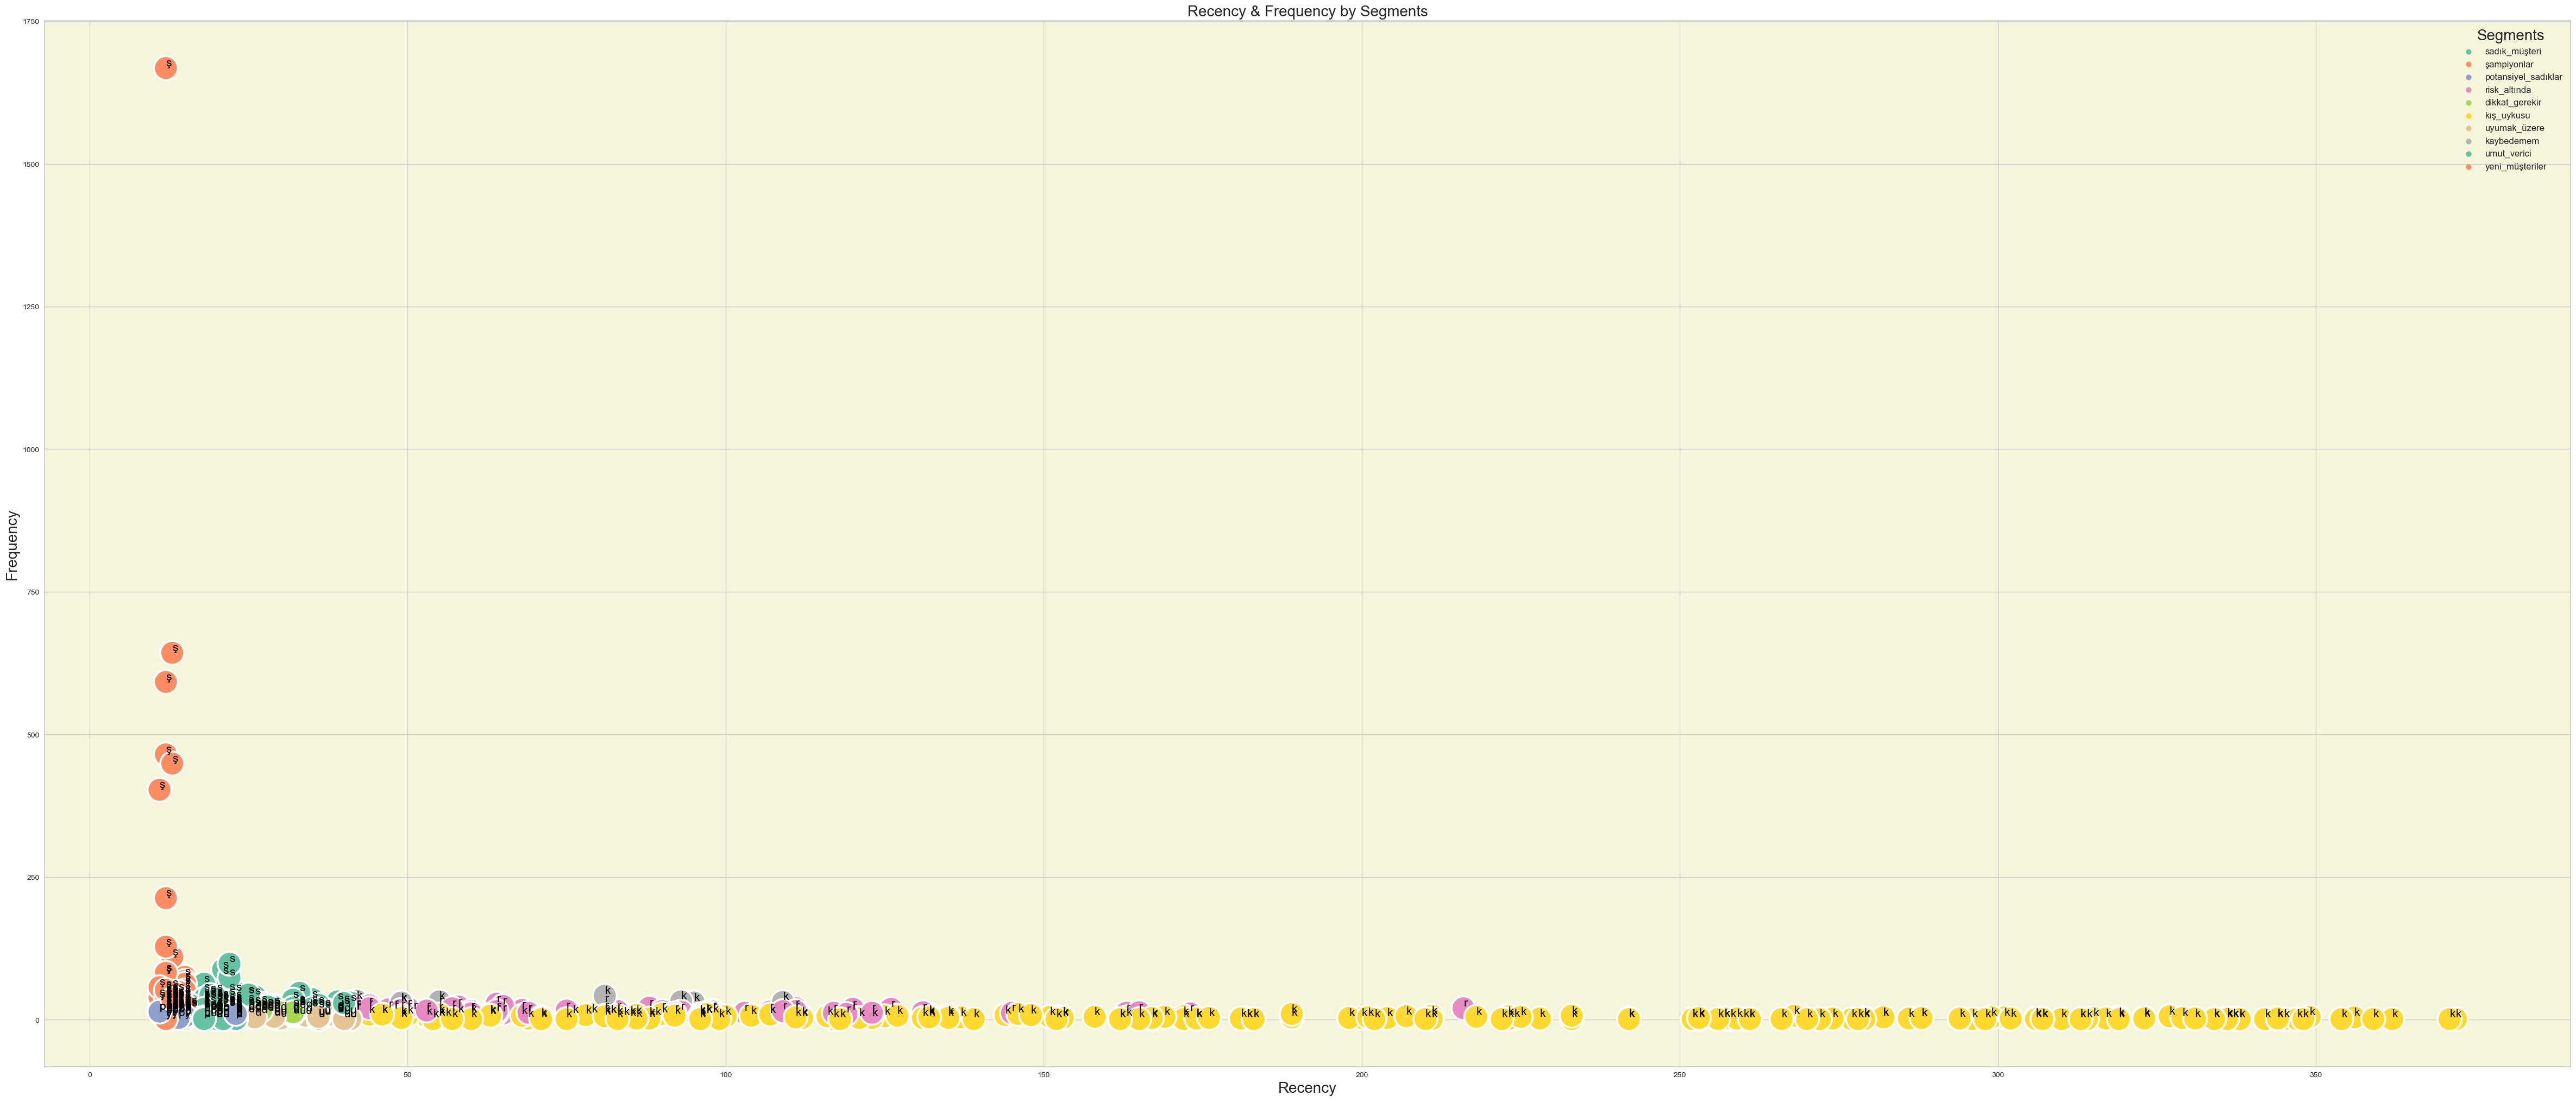

In [28]:
# scatter plot (dağılım grafiği)
plt.figure(figsize=(60,25))
ax = plt.gca()  # Mevcut ekseni al
ax.set_facecolor('beige') 
sns.scatterplot(
    data=rfm, x="recency", y="frequency", hue="segment", palette=palette, s=1000
)

# Etiketlerin eklenmesi
for i in range(len(rfm)):
    plt.text(
        x=rfm["recency"].iloc[i],       # Noktanın x ekseni değeri
        y=rfm["frequency"].iloc[i],     # Noktanın y ekseni değeri
        s=rfm["segment"].iloc[i][0],    # Yazdırılacak etiket (segment adı)
        fontsize=15,                     # Yazı boyutu
        color="black",                  # Yazı rengi
        ha="left",                      # Hizalama (soldan başlat)
        va="bottom"                     # Alt hizalı
    )


plt.title("Recency & Frequency by Segments", size=20)
plt.xlabel("Recency", size=20)
plt.ylabel("Frequency", size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=20)
plt.show()

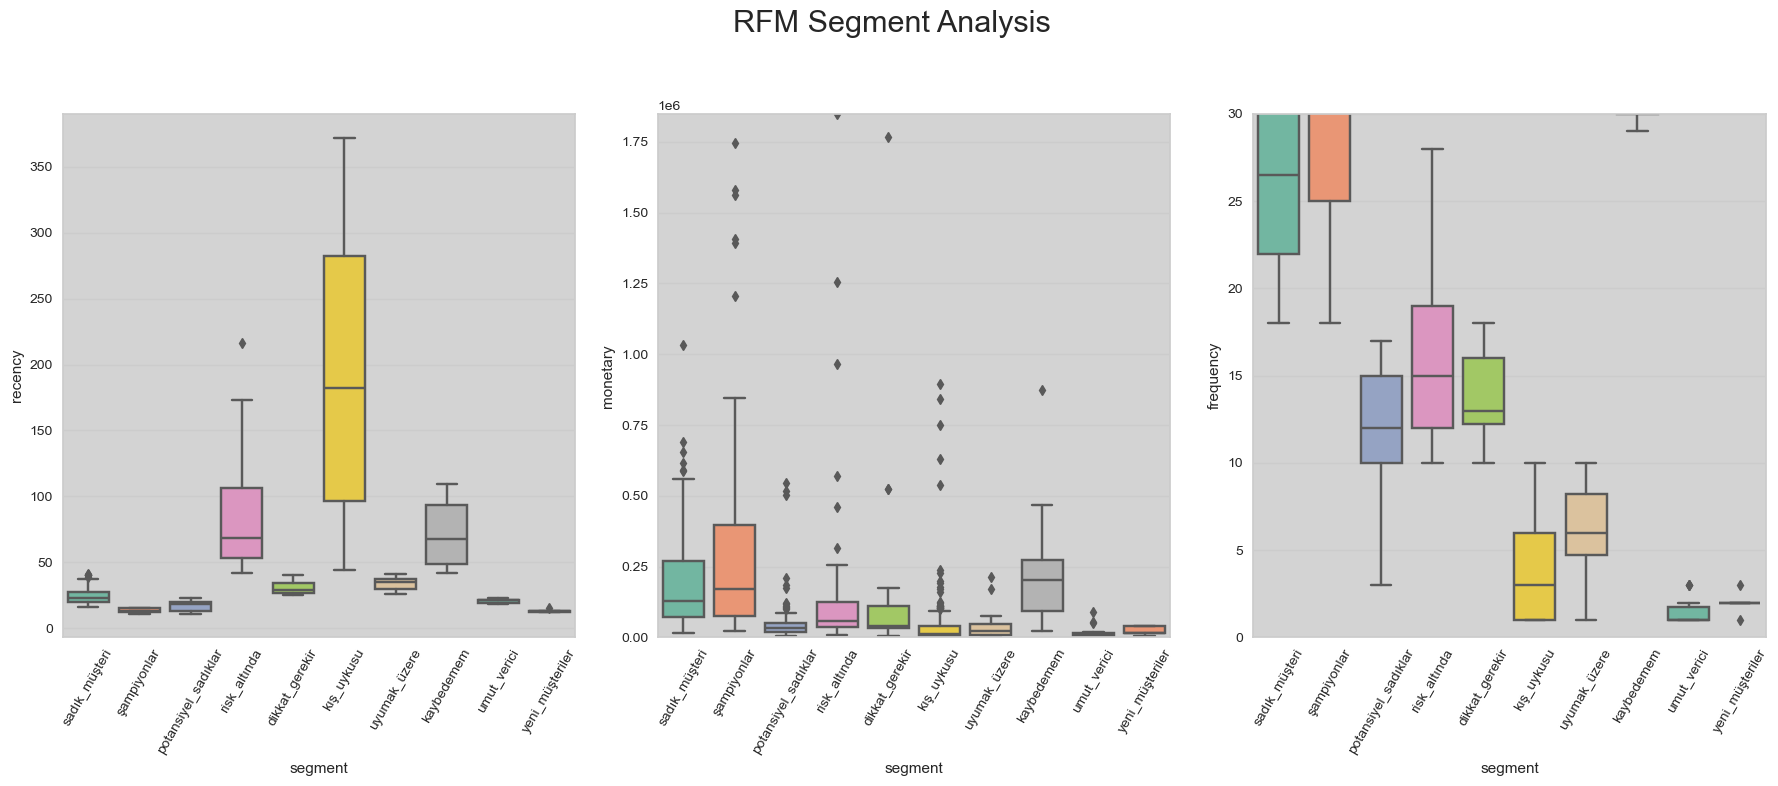

In [29]:
# boxplot grafiği
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=22)
feature_list = ["recency", "monetary", "frequency"]

for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm, x="segment", y=feature_list[idx], palette=palette
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    axes[idx].set_facecolor('lightgray')
    # Y eksenini veri aralığına göre ayarlama
    if idx == 1:  # monetary grafiği
        axes[idx].set_ylim([0, rfm['monetary'].max() * 0.1])  # Y eksenini veriye göre ayarla
    
    if idx == 2:  # frequency grafiği
        axes[idx].set_ylim([0, 30])  # Frequency için sabit bir sınır koy
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Grafiklerin üst kısmında daha fazla alan açın
plt.show()



In [30]:
#recency = son satın alması ile ilk satın alamsı arasındaki süre
#T = Müşterinin ilk giriş tarihi ile bugün arasına geçen süre
# Frequency(Sıklık) : Toplam satın alma sayısı
# Monetary( Parasal değer) : Müşterinin yaptığı toplam harcama


cltv_df = df.groupby("MÜŞTERİ ID").agg(
    {
        "FATURA TARİHİ": [
            lambda x: (x.max() - x.min()).days,
            lambda x: (today_date - x.min()).days,
        ],
        "FATURA NUMARASI": "nunique",
        "TOPLAM FİYAT": "sum",
    }
)

cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ["recency", "T", "frequency", "monetary"]
cltv_df.head()

,recency,T,frequency,monetary
MÜŞTERİ ID,,,,
12005.0,353,371,28,293643.49
12008.0,357,371,25,104992.45
12010.0,355,373,49,130220.31
12011.0,301,321,17,40877.54
12012.0,357,371,38,174263.15


In [31]:
#müşterinin ortalama sipariş değeri
cltv_df["monetary"]= cltv_df["monetary"]/cltv_df["frequency"]

#Recency & Tenure
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

#Frequency
cltv_df = cltv_df[(cltv_df["frequency"]>1)]

In [32]:
#bir müşterinin tekrar satın alma davranışını modellemek ve tahminlemek için modeli eğitir
BGF = BetaGeoFitter(penalizer_coef = 0.001) #aşırı öğrenmden(overfitting) kaçınmak için ceza katsayısı verilir

BGF.fit(cltv_df["frequency"], cltv_df["recency"], cltv_df["T"])

<lifetimes.BetaGeoFitter: fitted with 575 subjects, a: 0.09, alpha: 2.04, b: 2.95, r: 1.25>

In [33]:
#Her müşterinin 1 hafta içinde yapması beklenen işlem sayısı
BGF.conditional_expected_number_of_purchases_up_to_time(
    #week
    1, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Beklenen İşlem Sayısı"
).reset_index()

,MÜŞTERİ ID,Beklenen İşlem Sayısı
0,32005.0,2.851208
1,14704.0,2.264015
2,12081.0,1.953456
3,14330.0,1.519610
4,14598.0,1.485644
5,12240.0,1.479255
6,14120.0,1.412360
7,14840.0,1.382296
8,12342.0,1.345487
9,13960.0,1.302640


In [34]:
#Her müşterinin 4 hafta içinde yapması beklenen işlem sayısı
BGF.conditional_expected_number_of_purchases_up_to_time(
    4, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Beklenen İşlem Sayısı"
).reset_index()

,MÜŞTERİ ID,Beklenen İşlem Sayısı
0,32005.0,11.378114
1,14704.0,9.034786
2,12081.0,7.795535
3,14330.0,6.063988
4,14598.0,5.928766
5,12240.0,5.903168
6,14120.0,5.636269
7,14840.0,5.516316
8,12342.0,5.369483
9,13960.0,5.198426


In [35]:
#Establishing Gamma Gamma Modeli: Gelecekteki kazanca bakmak için kullanıyoruz
ggf = GammaGammaFitter(penalizer_coef=0.001)

cltv_df = cltv_df[cltv_df['monetary'] > 0]
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 575 subjects, p: 8.00, q: 0.26, v: 9.38>

In [36]:
# Beklenen Ortalama Kar

cltv_df["beklenen_ortalama_kar"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                             cltv_df['monetary'])

In [37]:
cltv_df.head().reset_index()

,MÜŞTERİ ID,recency,T,frequency,monetary,beklenen_ortalama_kar
0,12005.0,50.428571,53.000000,28,10487.267500,10522.482277
1,12008.0,51.000000,53.000000,25,4199.698000,4215.724423
2,12010.0,50.714286,53.285714,49,2657.557347,2662.792598
3,12011.0,43.000000,45.857143,17,2404.561176,2418.316268
4,12012.0,51.000000,53.000000,38,4585.872368,4597.348170


CLV (Customer Lifetime Value)
CLV = Ortalama Sipariş Değeri * Satın Alma Sıklığı * Müşteri Ömrü

In [38]:
#BG-NBD ve Gamma-Gamma modellerini bir araya getirerek yeni bir "clv" sütunu ekler.
#['frequency']Müşterinin, analiz dönemi boyunca gerçekleştirdiği satın alma sayısı.
#['recency']Müşterinin en son alışveriş yaptığı zaman ile ilk alışveriş yaptığı zaman arasındaki süre(hafta)
#['T']:Müşterinin ilk alışveriş tarihinden itibaren geçen toplam süre (hafta).
#['monetary']:Müşterinin her alışverişte harcadığı ortalama tutar
#time=3:CLV'nin hesaplanacağı süre. Burada 3, "3 ay" anlamına gelir.
#freq="W":Zaman ölçüm birimi. Bu durumda "W" haftayı temsil eder. 
#discount_rate=0.01:İndirim oranı (discount rate). Gelecekteki nakit akışlarını günümüze indirgemek için kullanılan oran


cltv_df["clv"] = ggf.customer_lifetime_value(BGF,
                            cltv_df['frequency'],
                            cltv_df['recency'],
                            cltv_df['T'],
                            cltv_df['monetary'],
                            time=3,  
                            freq="W", 
                            discount_rate=0.01)


In [39]:
cltv_df = cltv_df.reset_index()
cltv_df.head()

,MÜŞTERİ ID,recency,T,frequency,monetary,beklenen_ortalama_kar,clv
0,12005.0,50.428571,53.000000,28,10487.267500,10522.482277,69941.572844
1,12008.0,51.000000,53.000000,25,4199.698000,4215.724423,25230.900422
2,12010.0,50.714286,53.285714,49,2657.557347,2662.792598,30038.117091
3,12011.0,43.000000,45.857143,17,2404.561176,2418.316268,11484.665403
4,12012.0,51.000000,53.000000,38,4585.872368,4597.348170,41104.785732


In [40]:
#clv değerini segmente et
cltv_df["cltv_segment"] = pd.qcut(cltv_df["clv"], 4, labels=["D", "C", "B", "A"])

In [41]:
cltv_df.groupby("cltv_segment").agg({"count", "mean", "sum"})

MÜŞTERİ ID                     recency                     \
                      mean count        sum       mean count          sum   
cltv_segment                                                                
D             14415.958333   144  2075898.0  28.149802   144  4053.571429   
C             14552.972222   144  2095628.0  40.711310   144  5862.428571   
B             14215.216783   143  2032776.0  43.494505   143  6219.714286   
A             14843.145833   144  2137413.0  44.740079   144  6442.571429   

                      T                     frequency  ...        \
                   mean count          sum       mean  ...   sum   
cltv_segment                                           ...         
D             46.966270   144  6763.142857  35.118056  ...  5057   
C             47.202381   144  6797.142857  17.784722  ...  2561   
B             48.638362   143  6955.285714  21.167832  ...  3027   
A             48.378968   144  6966.571429  34.319444  ...  4942   

                  monetary                     beklenen_ortalama_kar        \
                      mean count           sum                  mean count   
cltv_segment                                                                 
D              7196.538496   144  1.036302e+06           7439.253124   144   
C              4142.920892   144  5.965806e+05           4208.320100   144   
B              6975.051900   143  9.974324e+05           7079.123546   143   
A             29136.720439   144  4.195688e+06          29447.841396   144   

                                      clv                      
                       sum           mean count           sum  
cltv_segment                                                   
D             1.071252e+06    2250.472783   144  3.240681e+05  
C             6.059981e+05    9878.899242   144  1.422561e+06  
B             1.012315e+06   24304.132319   143  3.475491e+06  
A             4.240489e+06  179872.930950   144  2.590170e+07  

[4 rows x 21 columns]

In [42]:
cltv_df.head()


,MÜŞTERİ ID,recency,T,frequency,monetary,beklenen_ortalama_kar,clv,cltv_segment
0,12005.0,50.428571,53.000000,28,10487.267500,10522.482277,69941.572844,A
1,12008.0,51.000000,53.000000,25,4199.698000,4215.724423,25230.900422,B
2,12010.0,50.714286,53.285714,49,2657.557347,2662.792598,30038.117091,B
3,12011.0,43.000000,45.857143,17,2404.561176,2418.316268,11484.665403,C
4,12012.0,51.000000,53.000000,38,4585.872368,4597.348170,41104.785732,A


In [43]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
MÜŞTERİ ID,,,,,,,,
12005.0,18,28,293643.49,4,4,5,44,sadık_müşteri
12008.0,14,25,104992.45,5,4,4,54,şampiyonlar
12010.0,18,49,130220.31,4,5,4,45,sadık_müşteri
12011.0,20,17,40877.54,4,3,3,43,potansiyel_sadıklar
12012.0,14,38,174263.15,5,5,4,55,şampiyonlar


MERGE DATASET

In [44]:
#MERGE DATASET

cltv_rfm = pd.merge(cltv_df, rfm, on='MÜŞTERİ ID', how='inner')
cltv_rfm.head(5)

# Başlıkları ortala
cltv_rfm.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
).set_properties(**{'text-align': 'center'})

In [45]:
#Hem A segmentinde olup hemde risk altında grubunda olan müşteri var mı?
filtered_df = cltv_rfm[(cltv_rfm['cltv_segment'] == 'A') & (cltv_rfm['segment'].isin(['risk_altında']))]
print("Risk altında olup A sınıfında bulunan müşteri sayısı: ", filtered_df.shape[0], "kişi")
print("********************************************************")
filtered_df

Risk altında olup A sınıfında bulunan müşteri sayısı:  8 kişi
********************************************************


,MÜŞTERİ ID,recency_x,T,frequency_x,monetary_x,beklenen_ortalama_kar,clv,cltv_segment,recency_y,frequency_y,monetary_y,recency_score,frequency_score,monetary_score,RF_SCORE,segment
52,12334.0,44.000000,52.285714,23,42022.287391,42192.959838,199088.971534,A,58,23,966512.61,2,4,5,24,risk_altında
177,14059.0,36.000000,44.142857,12,11622.230833,11713.611400,39212.111337,A,57,12,139466.77,2,3,4,23,risk_altında
189,14157.0,45.000000,52.857143,25,9377.420000,9412.740583,47855.713198,A,55,25,234435.50,2,4,5,24,risk_altında
236,14418.0,43.714286,52.285714,15,12266.626000,12343.628733,43057.248604,A,60,15,183999.39,2,3,4,23,risk_altında
289,14602.0,44.000000,50.857143,20,62662.803000,62955.428334,297023.092436,A,48,20,1253256.06,2,4,5,24,risk_altında
296,14629.0,44.000000,53.285714,24,23764.579167,23857.231687,101725.819786,A,65,24,570349.90,2,4,5,24,risk_altında
305,14645.0,41.428571,52.142857,16,115572.183125,116247.101953,383406.698584,A,75,16,1849154.93,2,3,5,23,risk_altında
341,14726.0,46.142857,53.285714,21,8802.412857,8841.938398,41526.478725,A,50,21,184850.67,2,4,4,24,risk_altında


In [46]:
# Jupyter Notebook ve diğer IPython ortamlarında özel olarak görüntüleme işlemleri için kullanılan bir modüldür.
# display fonksiyonu, bir nesneyi veya veriyi daha kullanıcı dostu bir formatta ekranda gösterir.
from IPython.display import display
display(filtered_df)

,MÜŞTERİ ID,recency_x,T,frequency_x,monetary_x,beklenen_ortalama_kar,clv,cltv_segment,recency_y,frequency_y,monetary_y,recency_score,frequency_score,monetary_score,RF_SCORE,segment
52,12334.0,44.000000,52.285714,23,42022.287391,42192.959838,199088.971534,A,58,23,966512.61,2,4,5,24,risk_altında
177,14059.0,36.000000,44.142857,12,11622.230833,11713.611400,39212.111337,A,57,12,139466.77,2,3,4,23,risk_altında
189,14157.0,45.000000,52.857143,25,9377.420000,9412.740583,47855.713198,A,55,25,234435.50,2,4,5,24,risk_altında
236,14418.0,43.714286,52.285714,15,12266.626000,12343.628733,43057.248604,A,60,15,183999.39,2,3,4,23,risk_altında
289,14602.0,44.000000,50.857143,20,62662.803000,62955.428334,297023.092436,A,48,20,1253256.06,2,4,5,24,risk_altında
296,14629.0,44.000000,53.285714,24,23764.579167,23857.231687,101725.819786,A,65,24,570349.90,2,4,5,24,risk_altında
305,14645.0,41.428571,52.142857,16,115572.183125,116247.101953,383406.698584,A,75,16,1849154.93,2,3,5,23,risk_altında
341,14726.0,46.142857,53.285714,21,8802.412857,8841.938398,41526.478725,A,50,21,184850.67,2,4,4,24,risk_altında


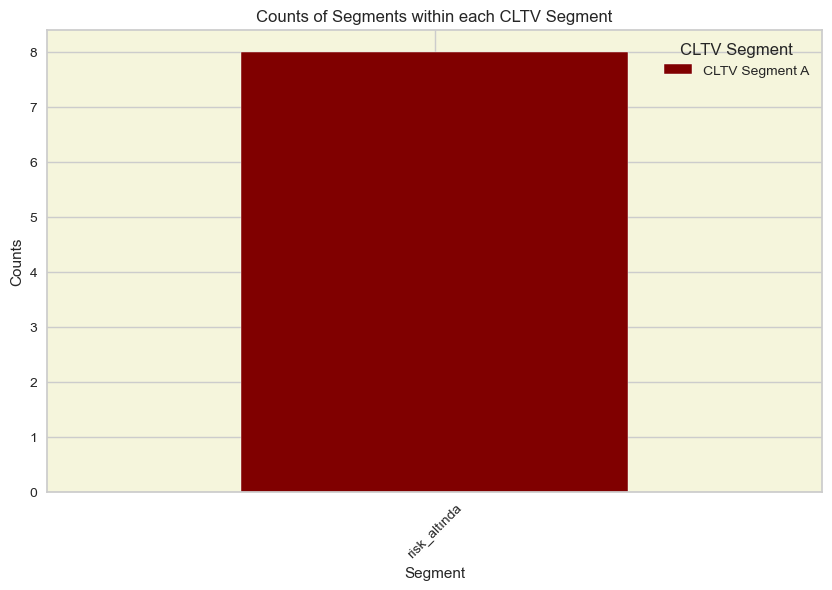

In [47]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Count plot for each cltv_segment
for cltv_segment in filtered_df['cltv_segment'].unique():
    subset = filtered_df[filtered_df['cltv_segment'] == cltv_segment]
    segment_counts = subset['segment'].value_counts()
    segment_counts.plot(kind='bar', ax=ax, label=f'CLTV Segment {cltv_segment}', color='#800000')

# Adding labels and title
ax.set_xlabel('Segment')
ax.set_ylabel('Counts')
ax.set_title('Counts of Segments within each CLTV Segment')
ax.legend(title='CLTV Segment')

ax.set_facecolor('beige')
# Display the plot
plt.xticks(rotation=45)
plt.show()

In [48]:
cltv_df.head()


,MÜŞTERİ ID,recency,T,frequency,monetary,beklenen_ortalama_kar,clv,cltv_segment
0,12005.0,50.428571,53.000000,28,10487.267500,10522.482277,69941.572844,A
1,12008.0,51.000000,53.000000,25,4199.698000,4215.724423,25230.900422,B
2,12010.0,50.714286,53.285714,49,2657.557347,2662.792598,30038.117091,B
3,12011.0,43.000000,45.857143,17,2404.561176,2418.316268,11484.665403,C
4,12012.0,51.000000,53.000000,38,4585.872368,4597.348170,41104.785732,A


In [49]:
#cltv kısmı bittii...

K-Means:
Makine Öğrenmesi > Denetimsiz Öğrenme > Kümeleme Algoritmaları > K-Means Algoritması

denetimsiz öğrenme veri setine bi etiket atayabilir miyim?
Yaptığımız segment etiket oldu. Artık deetimli öğrenme oldu. 
Ama etiketler fazla. Sınırlandırma yapılmalı

cltv' de grup sayısı belirlenirken:KMeans, DBSCAN veya Hiyerarşik Kümeleme gibi algoritmalar, segment sayısının seçilmesinde yardımcı olabilir. Örneğin, KMeans algoritmasında "elbow" yöntemi veya "silhouette score" gibi metrikler segment sayısını belirlemek için kullanılabilir.

In [50]:
# Her bir segment için müşteri ID'lerini gruplandır ve listele
segments_ids = cltv_rfm.groupby('segment')['MÜŞTERİ ID'].apply(list)

# Sonuçları yazdır
for segment, ids in segments_ids.items():
    print(f"{segment} Segmentindeki Müşteri ID'leri:")
    print(ids)
    print("-" * 50)  # Ayırıcı çizgi


dikkat_gerekir Segmentindeki Müşteri ID'leri:
[12080.0, 12092.0, 12311.0, 12330.0, 12515.0, 12523.0, 12601.0, 12677.0, 12848.0, 12849.0, 13023.0, 13487.0, 13656.0, 13987.0, 14032.0, 14178.0, 14304.0, 14328.0, 14504.0, 14527.0, 14644.0, 14679.0, 14773.0, 14780.0, 14781.0, 14799.0, 14945.0, 14984.0, 15018.0, 15098.0, 15099.0, 15115.0, 15121.0, 15123.0]
--------------------------------------------------
kaybedemem Segmentindeki Müşteri ID'leri:
[12332.0, 13095.0, 14639.0, 14707.0, 14806.0, 14866.0, 14893.0, 15019.0]
--------------------------------------------------
kış_uykusu Segmentindeki Müşteri ID'leri:
[12108.0, 12158.0, 12165.0, 12188.0, 12230.0, 12419.0, 12530.0, 12798.0, 12816.0, 12872.0, 12879.0, 12886.0, 12895.0, 13355.0, 13417.0, 13765.0, 13778.0, 13836.0, 13939.0, 13945.0, 13952.0, 13961.0, 14147.0, 14216.0, 14255.0, 14326.0, 14334.0, 14338.0, 14378.0, 14393.0, 14408.0, 14454.0, 14460.0, 14496.0, 14517.0, 14520.0, 14532.0, 14545.0, 14587.0, 14592.0, 14628.0, 14633.0, 14650.0, 

In [51]:
rfm_features = rfm[['recency', 'frequency', 'monetary']]

In [52]:
# Scale variables
sc = MinMaxScaler((0, 1))
rfm_features = sc.fit_transform(rfm_features)

#RFM özelliklerini MinMaxScaler kullanarak 0-1 arasında ölçeklendirdik. Bu ölçekleme sonrası verilerin 0 ile 1 arasında olmasını sağlayacak.
#Ölçekleme bize tüm özelliklerin analize eşit katkıda bulunmasını ve büyük ölçekli özellikledrin sonuçları domine etmesini önler.

In [53]:
rfm_features

array([[0.01939058, 0.01619676, 0.01588901],
       [0.00831025, 0.01439712, 0.00568103],
       [0.01939058, 0.02879424, 0.00704612],
       ...,
       [0.67036011, 0.00119976, 0.0034158 ],
       [0.033241  , 0.00539892, 0.00249958],
       [0.71745152, 0.        , 0.00122708]])

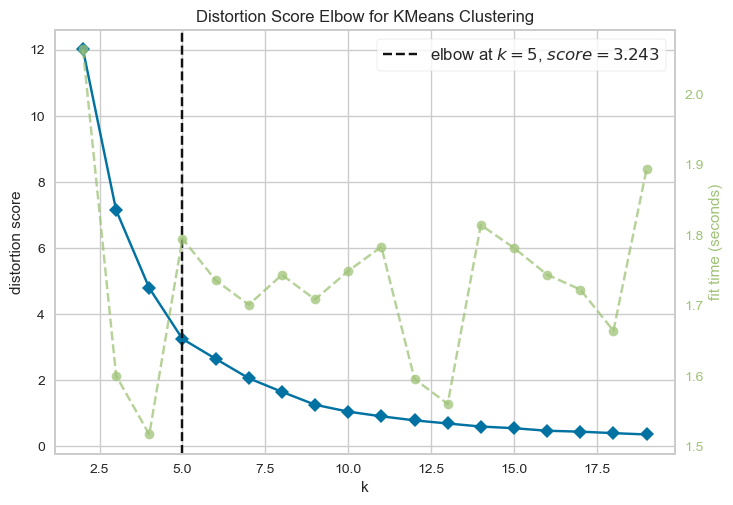

5 küme için Silhouette skoru: 0.68
5 küme için Davies-Bouldin skoru: 0.55


In [54]:
# Elbow Method
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(rfm_features)  # RFM özelliklerine uygula
elbow.show(block=True)

# Belirlenen küme sayısı ile KMeans modeli oluştur ve veriye uygula
optimal_clusters = elbow.elbow_value_  # Elbow yöntemi ile belirlenen optimal küme sayısı
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans_model.fit_predict(rfm_features)

# Silhouette Skoru
silhouette_avg = silhouette_score(rfm_features, cluster_labels)
print(f"5 küme için Silhouette skoru: {silhouette_avg:.2f}")

# Davies-Bouldin Skoru
davies_bouldin_avg = davies_bouldin_score(rfm_features, cluster_labels)
print(f"5 küme için Davies-Bouldin skoru: {davies_bouldin_avg:.2f}")



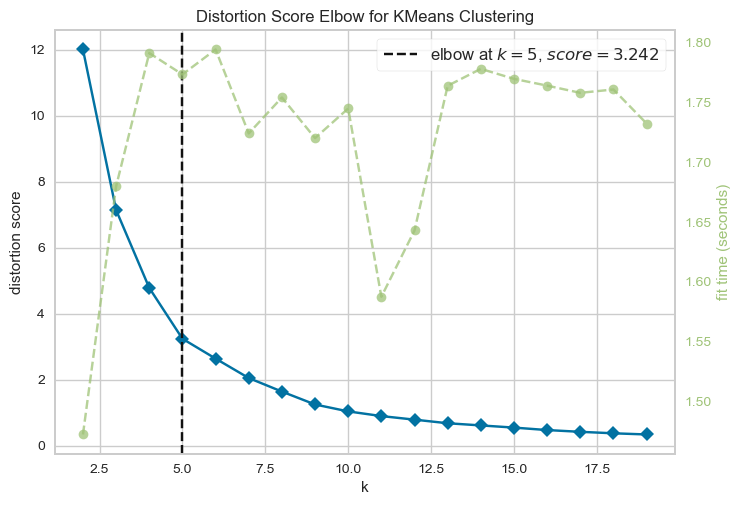

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20)) #farklı küme sayılarındaki (2 ile 20 arasında) kümeleme sonuçlarını değerlendirerek en uygun küme sayısını belirlemeye yardımcı olur.
elbow.fit(rfm_features) #oluşturulan görselleştiriciyi RFM özelliklerine (Recency, Frequency, Monetary) uygular. 
elbow.show(block=True) #elde edilen sonuçları grafiksel olarak gösterir. Bu grafikte, x ekseninde küme sayısı, y ekseninde ise WCSS değeri bulunur.

#En uygun küme sayısını belirlemek için elbow metodunu uyguladık.
#Grafikte genellikle bir "dirsek" noktası görülür. Bu dirsek noktası, küme sayısının artmasına rağmen 
#WCSS(her bir veri noktasının kendi kümesindeki merkez noktasına olan uzaklıklarının karelerinin toplamıdır. 
# WCSS değeri küçüldükçe, veri noktaları küme merkezlerine daha yakın olur, yani kümeler daha sıkı bir şekilde gruplanmış olur.
# değerindeki azalmanın anlamlı bir şekilde durduğu noktayı gösterir ve genellikle en uygun küme sayısı olarak kabul edilir.

In [56]:
elbow.elbow_value_

5

            recency   frequency      monetary  cluster
cluster                                               
0         23.559441   24.289044  2.106889e+05      0.0
1        306.422535    1.929577  4.021124e+04      1.0
2        187.425926    4.203704  5.515310e+04      2.0
3         93.808081   10.171717  9.729034e+04      3.0
4         12.833333  646.666667  9.591254e+06      4.0


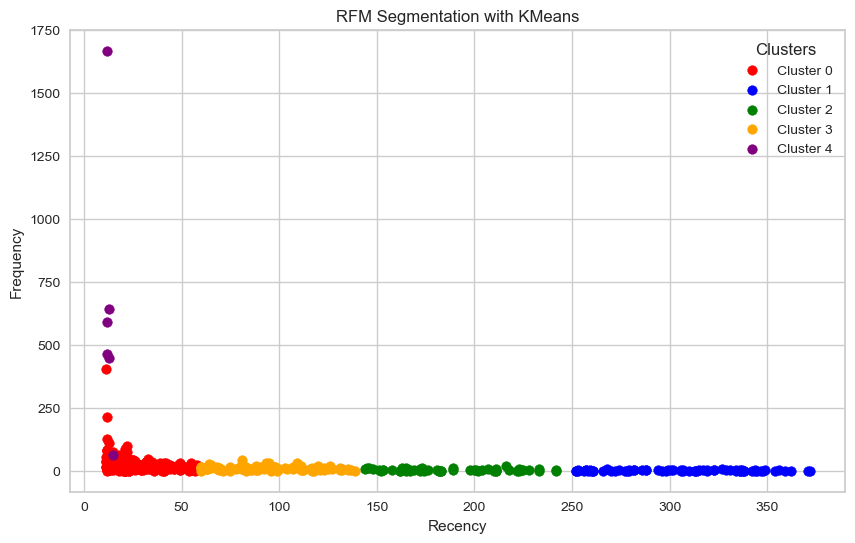

In [57]:
# KMeans ile segmentasyon
kmeans = KMeans(n_clusters=elbow.elbow_value_)
rfm['cluster'] = kmeans.fit_predict(rfm_features)

# Kümeler için manuel renk seçimi
custom_colors = ['red', 'blue', 'green', 'orange', 'purple']  # Her küme için belirlenen renkler
color_map = {cluster_id: custom_colors[cluster_id] for cluster_id in range(kmeans.n_clusters)}

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))

# Kümeler için renkleri kullanarak scatter plot
for cluster_id in range(kmeans.n_clusters):
    cluster_data = rfm[rfm['cluster'] == cluster_id]
    plt.scatter(cluster_data['recency'], cluster_data['frequency'], 
                color=color_map[cluster_id], label=f'Cluster {cluster_id}')

# Eksenler ve başlık
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Segmentation with KMeans')

# 'frequency' sütununu hariç tutarak grup ortalamalarını al
numeric_columns = [col for col in rfm.select_dtypes(include=['number']).columns if col != 'frequency']
cluster_summary = rfm.select_dtypes(include=['number']).groupby(rfm['cluster']).mean()

# Küme özetlerini yazdır
print(cluster_summary)

# Legend
plt.legend(title='Clusters')

# Gösterim
plt.show()


In [58]:
rfm_clusters_kmeans = kmeans.labels_
#Bu kod, KMeans modeli tarafından oluşturulan küme etiketlerini (labels_ özelliği) rfm_clusters_kmeans değişkenine atar.

In [59]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment,cluster
MÜŞTERİ ID,,,,,,,,,
12005.0,18,28,293643.49,4,4,5,44,sadık_müşteri,0
12008.0,14,25,104992.45,5,4,4,54,şampiyonlar,0
12010.0,18,49,130220.31,4,5,4,45,sadık_müşteri,0
12011.0,20,17,40877.54,4,3,3,43,potansiyel_sadıklar,0
12012.0,14,38,174263.15,5,5,4,55,şampiyonlar,0


In [60]:
rfm[['recency','monetary','frequency','cluster']]\
.groupby('cluster')\
.agg({'count','std','max','min'})

recency                          monetary                             \
            min        std  max count         min           std          max   
cluster                                                                        
0            11  11.557832   58   429        2.73  5.142851e+05   6380585.00   
1           252  34.450653  372    71      486.66  1.107419e+05    750543.36   
2           144  28.292676  242    54      465.78  9.972578e+04    631307.44   
3            60  22.286482  139    99      217.37  2.321187e+05   1849154.93   
4            12   1.169045   15     6  4334922.35  5.730106e+06  18480753.49   

              frequency                          
        count       min         std   max count  
cluster                                          
0         429         1   26.406870   403   429  
1          71         1    1.334423     7    71  
2          54         1    4.011209    20    54  
3          99         1    7.614487    42    99  
4           6        63  540.160223  1668     6

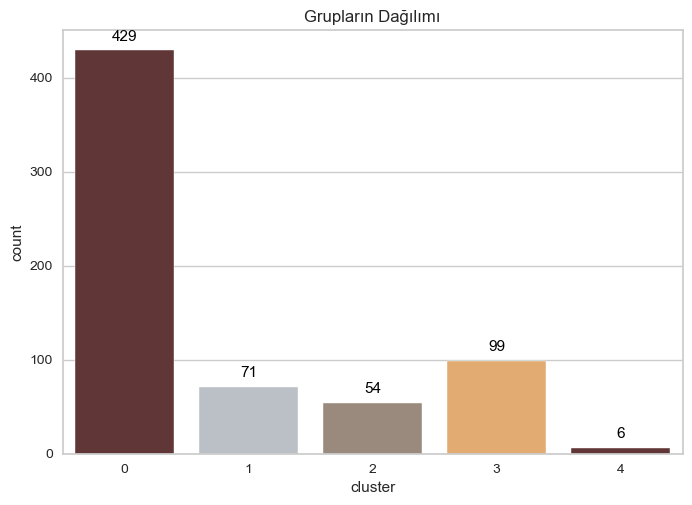

In [61]:
# Kümelerin countplot'unu çizme
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
pl = sns.countplot(x=rfm["cluster"], palette=pal)

# Her çubuğun üzerine kişi sayılarını ekleme
for p in pl.patches:
    pl.annotate(f'{int(p.get_height())}',       # Çubuğun yüksekliği (kişi sayısı)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Çubuğun üst ortası
                ha='center', va='center',      # Yatay ve dikey hizalama
                fontsize=11, color='black',    # Yazı stili
                xytext=(0, 10),                # Yazan metnin çubuğun biraz üstüne kaydırılması
                textcoords='offset points')

pl.set_title("Grupların Dağılımı")
plt.show()


#RFM modellemesinden elde edilen her bir kümenin büyüklüğünü karşılaştırmalı olarak görmenizi sağlar.